# <p style="text-align:center;"> Machine Learning & Statistics- Assessment 2019</p>

![title](img/Image2.png)

# <p style="text-align:center;"> The Boston House Price Dataset</p>

## <font color=red> Setting up the environment</font>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.datasets import load_boston 
from string import ascii_letters
%matplotlib inline 

In [13]:
df = load_boston()
print(df.data.shape)


(506, 13)


<h3 style="text-align: center;"> The Datasets Variables</h3>


|s.No |Attributes     |Description                                                         |
|----:---------------:-------------------------------------------------------------------:-
|1.   |CRIM           |per capita crime rate by town                                       |
|2.   |ZN             |the proportion of residential land zoned for lots over 25,000 sq.ft.|
|3.   |INDUS          |the proportion of non-retail business acres per town                |
|4.   |CHAS           |Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
|5.   |NOX            |nitric oxides concentration (parts per 10 million)                  |
|6.   |RM             |the average number of rooms per dwelling                            |
|7.   |AGE            |the proportion of owner-occupied units built prior to 1940          |
|8.   |DIS            |weighted distances to five Boston employment centres                |
|9.   |RAD            |index of accessibility to radial highways                           |
|10.  |TAX            |full-value property-tax rate per 10,000                             |
|11.  |PTRATIO        |the pupil-teacher ration by the town                                |
|12.  |B-1000(BK-0.63)|Where Bk is the proportion of blacks by the town                    | 
|13.  |LSTAT          |percentage lower status of the population                           |
|14.  |MEDV           |the median value of owner-occupied homes in  1000's                 |


The dataset variables can be categorised as follows :<br>

**Dependent**<br>
<br>
*target*<br>
The median value of owner-occupied houses.<br>
<br>
**Structural**<br>
<br>
*RM*<br>
The average number of rooms in owner units, it represents spaciousness and can also represent a better quality home.<br>
<br>
*AGE*<br>
This represents the proportion of houses completed before 1940.<br>
<br>
**Area**<br>
<br>
*B*<br>
This variable indicates the black proportion of the population. In 1970 you would expect where an increase in B exists would have a negative impact on house value.<br>
<br>
*LSTAT*<br>
Proportion of adults without some high-school education and proportion of male workers classified as labourers.<br>
<br>
*CRIM*<br>
Crime rate by town. We would expect that high levels of this variable would have an negative impact on prices.<br>
<br>
*ZN*<br>
Proportion of town's residential land zoned for units over 25,000 sq ft. As this restricts the construction of small lot houses, we would expect to see a positive correlation with the median value.<br>
<br>
*INDUS*<br>
This variable is the proportion of nonretail business acres per town. Noise and heavy traffic should negatively effect the house values.<br>
<br>
*TAX*<br>
Full value property tax rate ($10,000). It measures the cost of public services in each community.<br>
<br>
*PTRATIO*<br>
Measures public sector benefits in each town. A low ration should imply that each student receives more individual attention.<br>
<br>
*CHAS*<br>
This variable captures the amenities of a riverside location and therefore the coefficient should be positive.<br>
<br>
**Accessibility**<br>
<br>
*DIS*<br>
Weighted distance to 5 employment centres in the Boston region. House prices *should* be higher the nearer they are to employment centres.<br>
<br>
*RAD*<br>
The highway access index was calculate on a town basis.<br>
<br>
**Air Pollution**<br>
<br>
*NOX*<br>
Nitrogen oxide concentration in pphm (annual average concentration in parts per hundred million).<br>
<br> centre 


# <font color=red> Interesting Highlights</font>

<font color=blue|red|green|pink|yellow>Text</font>
<p> I was interested to investigate if there was a pattern in relation to the median house values. As you can see from the bar chart below, it is clear that the median value of the house prices are normally distributed, half of the values fall to the left of the mean and half are to the right.</p>
<p>
It is worth noting that the variable **target** appears to be censored at 50.00. Censoring is suggested by the fact that in 16 instances the median value is exactly $50,000, while there are 15 instances have a prices between €40,000 and $50,000 [2].
</p>

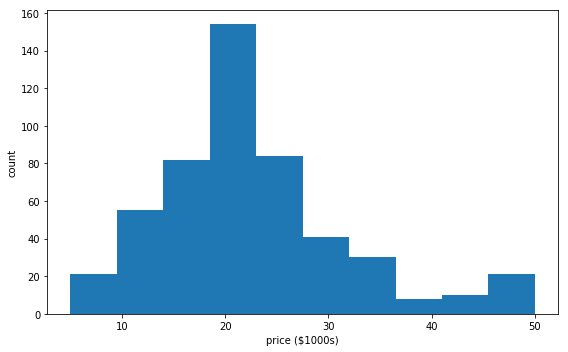

In [16]:
plt.figure(figsize=(8, 5))
plt.hist(boston.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [4]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [27]:
df.describe

<bound method NDFrame.describe of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0

In [5]:
boston.corr()

AttributeError: corr

In [22]:
x = df[['NOX', 'RAD']]

In [23]:
y = df['target']

In [24]:
import sklearn.linear_model as lm

In [25]:
m = lm.LinearRegression()

In [26]:
m.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
m.intercept_

38.11066028540406

In [28]:
m.coef_

array([-24.58862952,  -0.20301393])

In [29]:
m.score(x,y)

0.20573349786832074

In [14]:
# Calculating the score by hand.
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['CRIM'] + u * x['CHAS'] + v * x['RM'] + c))**2).sum()
v = ((y - y.mean())**2).sum()

1 - (u/v)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
boston.T.plot()
plt.ylabel('target')

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


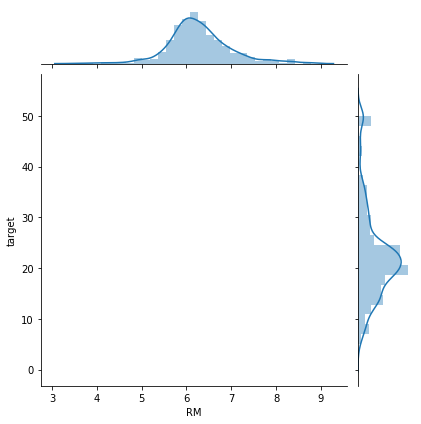

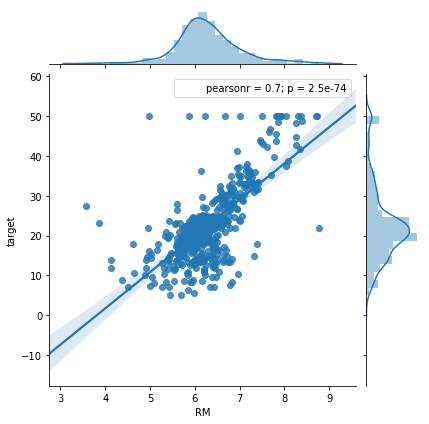

In [30]:
sns.jointplot(x='RM', y='target', data=df, kind='reg');
plt.show();

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


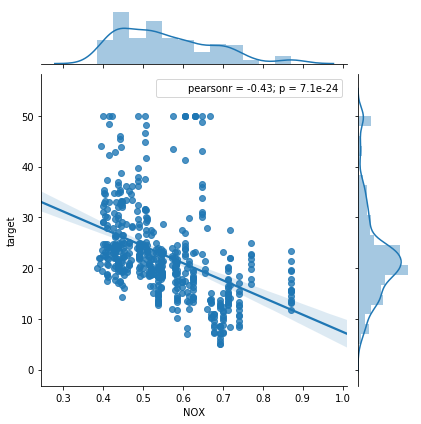

In [15]:
sns.jointplot(x='NOX', y='target', data=df, kind='reg');
plt.show();

In [ ]:
df.describe()

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


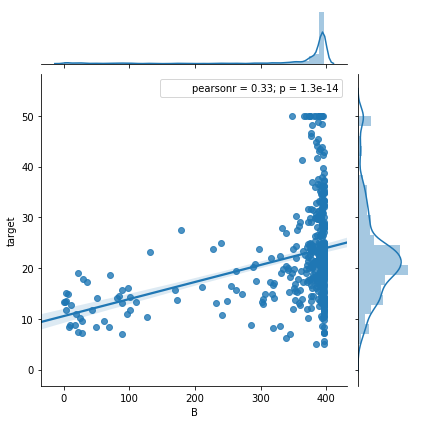

In [34]:
sns.jointplot(x='B', y='target', data=df, kind='reg');
plt.show();

### Now we will look at the variables that is most closely correlated with the median house value. To do this I will use the 

In [39]:
coor_matrix = df.corr()

In [40]:
coor_matrix["target"].sort_values(ascending=False)

target     1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

In [17]:
from pandas.plotting import scatter_matrix

# Scatter Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA05358>,
      dtype=object)

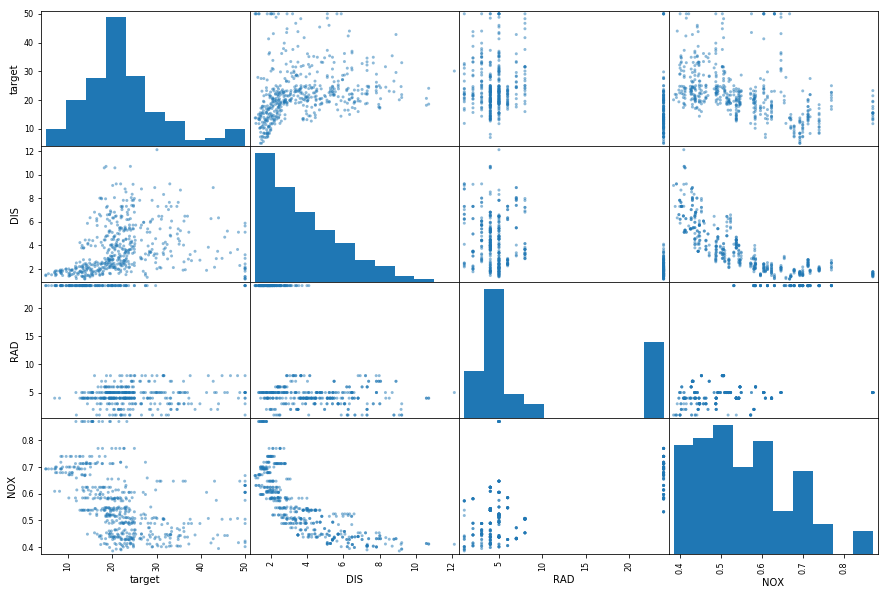

In [30]:
attributes = ["target", "DIS", "RAD", "NOX"]
scatter_matrix(df[attributes], figsize=(15, 10))


In [50]:
import seaborn as sns

In [54]:
cm = np.corrcoef(df)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)

NameError: name 'cols' is not defined

In [55]:
print("Boston housing dataset has {} data points with {} variables each.".format(*df.shape))

Boston housing dataset has 506 data points with 14 variables each.


In [62]:
import numpy.ma as ma

In [63]:
# Minimum price of the data
minimum_price = np.amin('target')

# Maximum price of the data
maximum_price = np.amax('target')

# Mean price of the data
mean_price = np.mean('target')

# Median price of the data
median_price = np.median('target')

# Standard deviation of prices of the data
std_price = np.std('target')

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

TypeError: cannot perform reduce with flexible type

In [26]:
import statsmodels.api as sm

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [47]:
xwithc = sm.add_constant(x)

msm = sm.OLS(y, xwithc)

rsm = msm.fit()
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     69.06
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           3.16e-27
Time:                        11:18:41   Log-Likelihood:                -1778.9
No. Observations:                 506   AIC:                             3564.
Df Residuals:                     503   BIC:                             3576.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8177      0.971     30.700      0.0

In [19]:
x = df['NOX']
y = df['target']
m, c = np.polyfit(x, y, 1)

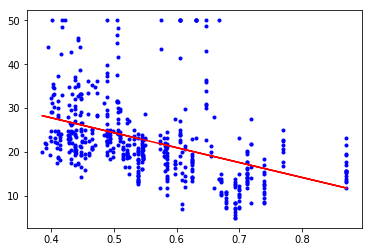

In [20]:
plt.plot(x, y, 'b.')
plt.plot(x, m * x + c, 'r-')
plt.show()

In [83]:
df = pd.DataFrame(boston.data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [84]:
df['target'] = boston.target

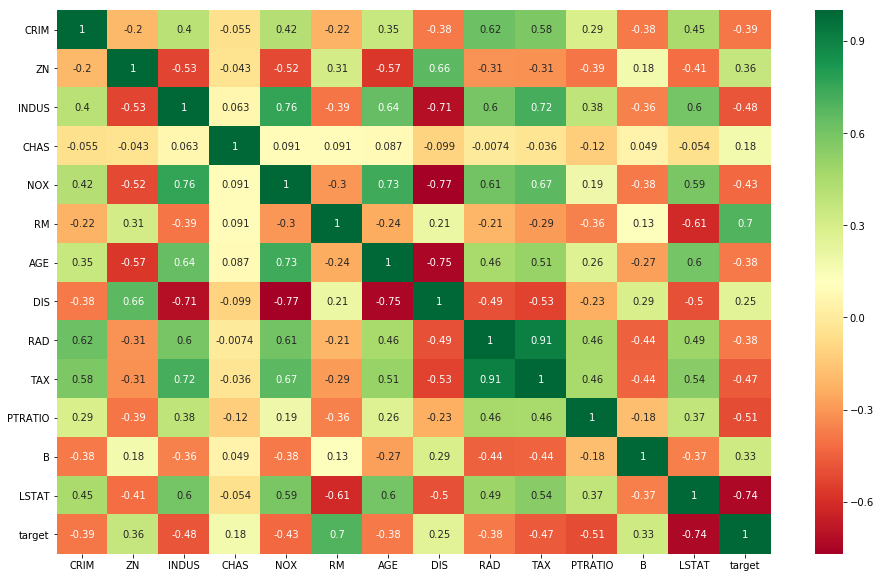

In [87]:
ax, fig = plt.subplots(figsize = (16, 10))
sns.heatmap(df.corr(), annot= True, cmap = 'RdYlGn')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BBEC2B0>,
      dtype=object)

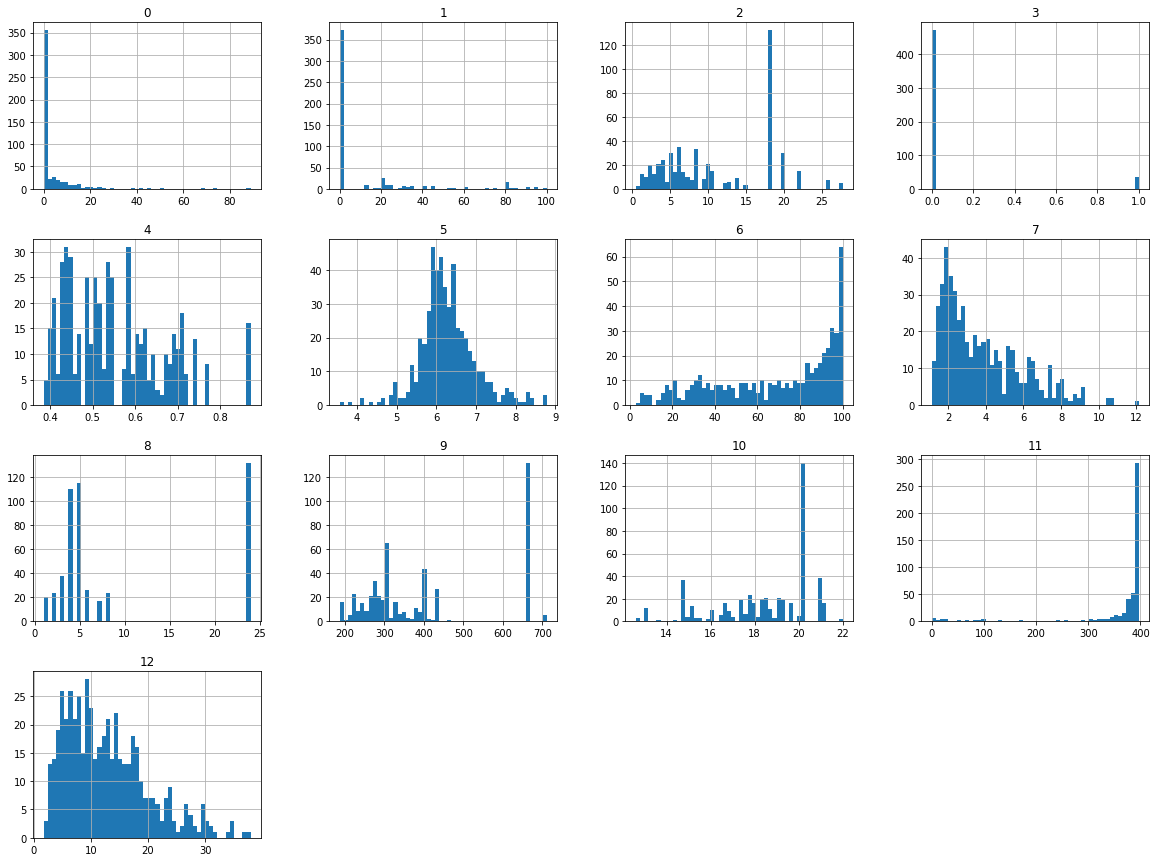

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

housing_data = load_boston()
%matplotlib inline

pd.DataFrame(housing_data['data']).hist(bins = 50, figsize = (20, 15))